In [2]:
#보스턴 집값

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()
x = boston.data
y = boston.target
col_names = boston.feature_names

In [4]:
import pandas as pd
import numpy as np

In [5]:
# 인풋(x) 컬럼명(col_names)
bhp = pd.DataFrame(x, columns = col_names)

In [6]:
print(len(y))
bhp.info()

506
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [7]:
bhp['MEDV'] = y
bhp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
#훈련, 트레이닝 분류
from sklearn.model_selection import train_test_split

y = bhp['MEDV']
x = bhp.drop(['MEDV'],axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.15, stratify = bhp['CHAS'], random_state=2021)

In [11]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train,y_train, test_size=3/17, stratify = x_train['CHAS'], random_state=2021 )

In [12]:
#민맥스 스케일러 (훈련, 테스트, 벨리드)
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()

num_train = []
num_train.append(x_train['NOX'].values)
num_train.append(x_train['RM'].values)
scaler.fit(num_train)
x_train['NOX'], x_train['RM'] = scaler.transform(num_train)[0], scaler.transform(num_train)[1]

num_test = []
num_test.append(x_test['NOX'].values)
num_test.append(x_test['RM'].values)
scaler.fit(num_test)
x_test['NOX'], x_test['RM'] = scaler.transform(num_test)[0], scaler.transform(num_test)[1]

num_valid = []
num_valid.append(x_valid['NOX'].values)
num_valid.append(x_valid['RM'].values)
scaler.fit(num_valid)
x_valid['NOX'], x_valid['RM'] = scaler.transform(num_valid)[0], scaler.transform(num_valid)[1]



<ipython-input-12-b3a311759d78>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['NOX'], x_test['RM'] = scaler.transform(num_test)[0], scaler.transform(num_test)[1]


In [14]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()

num_train = []
num_train.append(x_train['RAD'].values)
num_train.append(x_train['B'].values)
scaler.fit(num_train)
x_train['RAD'], x_train['B'] = scaler.transform(num_train)[0], scaler.transform(num_train)[1]

num_test = []
num_test.append(x_test['RAD'].values)
num_test.append(x_test['B'].values)
scaler.fit(num_test)
x_test['RAD'], x_test['B'] = scaler.transform(num_test)[0], scaler.transform(num_test)[1]

num_valid = []
num_valid.append(x_valid['RAD'].values)
num_valid.append(x_valid['B'].values)
scaler.fit(num_valid)
x_valid['RAD'], x_valid['B'] = scaler.transform(num_valid)[0], scaler.transform(num_valid)[1]

<ipython-input-14-852d4d2dfd53>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['RAD'], x_test['B'] = scaler.transform(num_test)[0], scaler.transform(num_test)[1]


In [15]:
#linear 학습
from sklearn.linear_model import LinearRegression

lr = LinearRegression(normalize=False).fit(x_train, y_train)
lr.coef_

array([-6.80980693e-02,  7.41144804e-02, -2.44050513e-01,  2.61126378e+00,
        5.38458167e-15, -3.38243749e-16,  1.61482601e-02, -1.47940453e+00,
       -5.96711023e-01,  2.77740420e-04, -7.93958686e-01,  5.96711023e-01,
       -8.31371456e-01])

In [16]:
#ridge 학습
from sklearn.linear_model import Ridge

ridge = Ridge(alpha =5)
ridge.fit(x_train, y_train)



Ridge(alpha=5)

In [17]:
# lasso 학습
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 1).fit(x_train,y_train)

In [19]:
#elastic 학습
# alpha = (l1 + l2) 
# l1_ratio = l1 / (l1 + l2)
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=3.5, l1_ratio = 0.5/3.5).fit(x_train, y_train)



In [25]:
#결과 확인

from sklearn.metrics import mean_squared_error

lr_pred = lr.predict(x_valid)
lr_rmse = mean_squared_error(y_valid, lr_pred)**0.5

ridge_pred = ridge.predict(x_valid)
ridge_rmse = mean_squared_error(y_valid, ridge_pred)**0.5

lasso_pred = lasso.predict(x_valid)
lasso_rmse = mean_squared_error(y_valid, lasso_pred)**0.5

elastic_pred = elastic.predict(x_valid)
elastic_rmse = mean_squared_error(y_valid, elastic_pred)**0.5

print(lr_rmse, ridge_rmse, lasso_rmse, elastic_rmse)

6.092119986486624 6.112222424678439 6.456411243731721 6.744614080803394


In [24]:
from sklearn.metrics import mean_absolute_error

lr_pred = lr.predict(x_test)
lr_rmse = mean_absolute_error(y_test, lr_pred)**0.5

ridge_pred = ridge.predict(x_test)
ridge_rmse = mean_absolute_error(y_test, ridge_pred)**0.5

lasso_pred = lasso.predict(x_test)
lasso_rmse = mean_absolute_error(y_test, lasso_pred)**0.5

elastic_pred = elastic.predict(x_test)
elastic_rmse = mean_absolute_error(y_test, elastic_pred)**0.5

print(lr_rmse, ridge_rmse, lasso_rmse, elastic_rmse)

1.901078357564314 1.9022381589072093 1.932637813955152 1.9440597232836614


In [27]:
#테스트 셋에서 CHAS가 1일때 

x_test_tmp = x_test[x_test['CHAS']==1]
y_test_tmp = y_test[x_test['CHAS']==1]

lr_pred = lr.predict(x_test_tmp)
lr_mae = mean_absolute_error(y_test_tmp, lr_pred)

ridge_pred = ridge.predict(x_test_tmp)
ridge_mae = mean_absolute_error(y_test_tmp, ridge_pred)

lasso_pred = lasso.predict(x_test_tmp)
lasso_mae = mean_absolute_error(y_test_tmp, ridge_pred)

elastic_pred = elastic.predict(x_test_tmp)
elastic_mae = mean_absolute_error(y_test_tmp, ridge_pred)

print(lr_mae, ridge_mae, lasso_mae, elastic_mae)

6.250854374452073 6.162161597732295 6.162161597732295 6.162161597732295


In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import ModelCheckpoint



In [33]:
#뉴럴 네트워크 모델

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse',metrics=['acc'])

mc = ModelCheckpoint('',monitor='val_loss',save_best_only = True)
history = model.fit(x_train, y_train, batch_size=64, epochs =200, validation_data=(x_valid,y_valid), callbacks=[mc])
model.save('best_model.h5')
          
          

Epoch 1/200
6/6 [==============================] - 2s 298ms/step - loss: 581.5597 - acc: 0.0000e+00 - val_loss: 1742.7338 - val_acc: 0.0000e+00
Epoch 2/200
6/6 [==============================] - 0s 9ms/step - loss: 564.6942 - acc: 0.0000e+00 - val_loss: 1793.0072 - val_acc: 0.0000e+00
Epoch 3/200
6/6 [==============================] - 1s 182ms/step - loss: 554.9193 - acc: 0.0000e+00 - val_loss: 1538.9443 - val_acc: 0.0000e+00
Epoch 4/200
6/6 [==============================] - 1s 184ms/step - loss: 546.3715 - acc: 0.0000e+00 - val_loss: 1322.1031 - val_acc: 0.0000e+00
Epoch 5/200
6/6 [==============================] - 1s 207ms/step - loss: 539.8419 - acc: 0.0000e+00 - val_loss: 1175.6600 - val_acc: 0.0000e+00
Epoch 6/200
6/6 [==============================] - 1s 179ms/step - loss: 533.3932 - acc: 0.0000e+00 - val_loss: 1006.8923 - val_acc: 0.0000e+00
Epoch 7/200
6/6 [==============================] - 1s 194ms/step - loss: 523.9901 - acc: 0.0000e+00 - val_loss: 975.4331 - val_acc: 0.0000

Epoch 35/200
6/6 [==============================] - 1s 174ms/step - loss: 299.6024 - acc: 0.0000e+00 - val_loss: 453.7657 - val_acc: 0.0000e+00
Epoch 36/200
6/6 [==============================] - 1s 216ms/step - loss: 289.9410 - acc: 0.0000e+00 - val_loss: 441.4240 - val_acc: 0.0000e+00
Epoch 37/200
6/6 [==============================] - 0s 7ms/step - loss: 280.7521 - acc: 0.0000e+00 - val_loss: 442.8689 - val_acc: 0.0000e+00
Epoch 38/200
6/6 [==============================] - 1s 177ms/step - loss: 268.6734 - acc: 0.0000e+00 - val_loss: 409.2320 - val_acc: 0.0000e+00
Epoch 39/200
6/6 [==============================] - 0s 7ms/step - loss: 259.6107 - acc: 0.0000e+00 - val_loss: 432.5657 - val_acc: 0.0000e+00
Epoch 40/200
6/6 [==============================] - 1s 176ms/step - loss: 248.0730 - acc: 0.0000e+00 - val_loss: 377.8158 - val_acc: 0.0000e+00
Epoch 41/200
6/6 [==============================] - 1s 178ms/step - loss: 236.5035 - acc: 0.0000e+00 - val_loss: 370.2007 - val_acc: 0.0000e

6/6 [==============================] - 1s 176ms/step - loss: 31.2246 - acc: 0.0000e+00 - val_loss: 69.9492 - val_acc: 0.0000e+00
Epoch 73/200
6/6 [==============================] - 1s 176ms/step - loss: 29.1043 - acc: 0.0000e+00 - val_loss: 69.3974 - val_acc: 0.0000e+00
Epoch 74/200
6/6 [==============================] - 1s 180ms/step - loss: 28.8815 - acc: 0.0000e+00 - val_loss: 56.2903 - val_acc: 0.0000e+00
Epoch 75/200
6/6 [==============================] - 1s 209ms/step - loss: 27.3006 - acc: 0.0000e+00 - val_loss: 45.5190 - val_acc: 0.0000e+00
Epoch 76/200
6/6 [==============================] - 1s 176ms/step - loss: 26.5753 - acc: 0.0000e+00 - val_loss: 45.2130 - val_acc: 0.0000e+00
Epoch 77/200
6/6 [==============================] - 1s 173ms/step - loss: 23.7678 - acc: 0.0000e+00 - val_loss: 40.1434 - val_acc: 0.0000e+00
Epoch 78/200
6/6 [==============================] - 1s 181ms/step - loss: 20.3713 - acc: 0.0000e+00 - val_loss: 33.5606 - val_acc: 0.0000e+00
Epoch 79/200
6/6 [=

6/6 [==============================] - 0s 7ms/step - loss: 14.8226 - acc: 0.0000e+00 - val_loss: 38.5847 - val_acc: 0.0000e+00
Epoch 124/200
6/6 [==============================] - 0s 7ms/step - loss: 11.4041 - acc: 0.0000e+00 - val_loss: 45.2215 - val_acc: 0.0000e+00
Epoch 125/200
6/6 [==============================] - 0s 7ms/step - loss: 11.9059 - acc: 0.0000e+00 - val_loss: 33.9235 - val_acc: 0.0000e+00
Epoch 126/200
6/6 [==============================] - 0s 7ms/step - loss: 11.4491 - acc: 0.0000e+00 - val_loss: 29.2007 - val_acc: 0.0000e+00
Epoch 127/200
6/6 [==============================] - 0s 7ms/step - loss: 11.0629 - acc: 0.0000e+00 - val_loss: 31.7914 - val_acc: 0.0000e+00
Epoch 128/200
6/6 [==============================] - 0s 7ms/step - loss: 14.6718 - acc: 0.0000e+00 - val_loss: 29.7388 - val_acc: 0.0000e+00
Epoch 129/200
6/6 [==============================] - 1s 176ms/step - loss: 13.0848 - acc: 0.0000e+00 - val_loss: 26.5129 - val_acc: 0.0000e+00
Epoch 130/200
6/6 [======

Epoch 178/200
6/6 [==============================] - 0s 7ms/step - loss: 10.4586 - acc: 0.0000e+00 - val_loss: 28.6534 - val_acc: 0.0000e+00
Epoch 179/200
6/6 [==============================] - 0s 7ms/step - loss: 10.8813 - acc: 0.0000e+00 - val_loss: 28.9612 - val_acc: 0.0000e+00
Epoch 180/200
6/6 [==============================] - 0s 7ms/step - loss: 12.5113 - acc: 0.0000e+00 - val_loss: 29.4597 - val_acc: 0.0000e+00
Epoch 181/200
6/6 [==============================] - 0s 8ms/step - loss: 9.8001 - acc: 0.0000e+00 - val_loss: 30.4417 - val_acc: 0.0000e+00
Epoch 182/200
6/6 [==============================] - 0s 8ms/step - loss: 9.8093 - acc: 0.0000e+00 - val_loss: 30.4681 - val_acc: 0.0000e+00
Epoch 183/200
6/6 [==============================] - 0s 7ms/step - loss: 8.8404 - acc: 0.0000e+00 - val_loss: 30.0710 - val_acc: 0.0000e+00
Epoch 184/200
6/6 [==============================] - 0s 7ms/step - loss: 11.3377 - acc: 0.0000e+00 - val_loss: 29.4923 - val_acc: 0.0000e+00
Epoch 185/200
6/

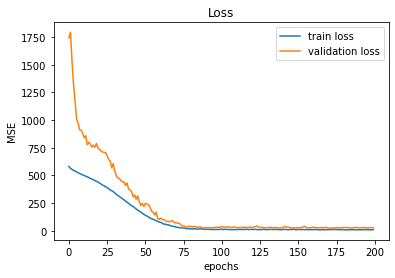

In [40]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'], label= 'validation loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()